<a href="https://colab.research.google.com/github/Petra865/AIDA/blob/master/Kopie_von_Paul_Quest_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In this quest, you will work with the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). It contains 60000 32x32 colour images in 10 classes, with 6000 images per class. Your task will be predicting image classes.


# Tasks

Normalize pixel values of both train and test images to the values in the range between 0 and 1

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
)
train_data = img_gen.flow(train_images, train_labels)
test_data = img_gen.flow(test_images, test_labels)

Build a sequential model with the following architecture:

conv2d - (None, 30, 30, 32)  
_________________________________________________________________
max_pooling2d - (None, 15, 15, 32)        
_________________________________________________________________
conv2d - (None, 13, 13, 64)
_________________________________________________________________
max_pooling2d - (None, 6, 6, 64)        
_________________________________________________________________
conv2d - (None, 4, 4, 128) 
_________________________________________________________________
flatten - (None, 2048)       
_________________________________________________________________
dense - (None, 64)    
_________________________________________________________________
dense - (None, 10)       


In [ ]:
# your code
import tensorflow as tf


model = tf.keras.models.Sequential(
    [
     tf.keras.Input(shape=(32, 32, 3)),
     tf.keras.layers.Conv2D(32, 3, activation='relu'),
     tf.keras.layers.MaxPool2D((2,2)),
     tf.keras.layers.Conv2D(64, 3, activation='relu'),
     tf.keras.layers.MaxPool2D((2,2)),
     tf.keras.layers.Conv2D(128, 3, activation='relu'),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

Compile the model using Adam optimizer, sparse categorical crossentropy as loss function, and MSE as error metric. Use 10 epochs to train the model.

In [ ]:
# your code
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["mean_squared_error"])
model.fit(train_data, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4731 - accuracy: 0.4661 - val_loss: 1.2114 - val_accuracy: 0.5623
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0726 - accuracy: 0.6215 - val_loss: 1.0292 - val_accuracy: 0.6391
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9091 - accuracy: 0.6804 - val_loss: 0.8911 - val_accuracy: 0.6927
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8040 - accuracy: 0.7189 - val_loss: 0.8948 - val_accuracy: 0.6906
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7191 - accuracy: 0.7497 - val_loss: 0.8419 - val_accuracy: 0.7162
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6528 - accuracy: 0.7710 - val_loss: 0.8472 - val_accuracy: 0.7127
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.5941 - accuracy: 0.7900 - val_loss: 0.8788 -

Evaluate the model on test data to get the loss and accuracy metrics

313/313 - 4s - loss: 0.9471 - accuracy: 0.7133


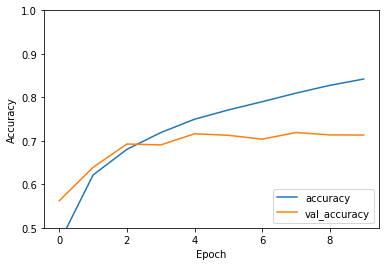

In [ ]:
# your code
